# Model a Galaxy Cluster

## Notebook for generating an example galaxy cluster model. 

This notebook goes through the steps to generate model data for galaxy cluster weak lensing observables.  In particular, we define a galaxy cluster model that follows and NFW distribution and generate various profiles for the model (mass density, convergence, shear, etc.), which we plot.  Note, a full pipeline to measure a galaxy cluster weak lensing mass requires fitting the observed (or mock) data to a model. In this notebook we use the OO interface to theory.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Imports specific to clmm 

In [2]:
import os

os.environ['CLMM_MODELING_BACKEND'] = 'nc' # here you may choose ccl, nc (NumCosmo) or ct (cluster_toolkit)

import clmm
from clmm import Cosmology

Make sure we know which version we're using

In [3]:
clmm.__version__

'1.0.8'

Define a cosmology using astropy

In [4]:
cosmo = Cosmology(H0=70.0, Omega_dm0=0.27-0.045, Omega_b0=0.045, Omega_k0=0.0)

Define the galaxy cluster model.  Here, we choose parameters that describe the galaxy cluster model, including the mass definition, concentration, and mass distribution.  For the mass distribution, we choose a distribution that follows an NFW profile.

In [5]:
moo = clmm.Modeling(massdef='mean', delta_mdef=200, halo_profile_model='nfw')

moo.set_cosmo(cosmo)
moo.set_concentration(4)
moo.set_mass(1.e15)

z_cl = 1.
z_source = 2.
alpha = [2, -0.5] 

Quick test of all theory functionality

In [6]:
r3d = np.logspace(-2, 2, 100)
rho = moo.eval_3d_density(r3d, z_cl)
Sigma = moo.eval_surface_density(r3d, z_cl)
DeltaSigma = moo.eval_excess_surface_density(r3d, z_cl)
Sigmac = moo.eval_critical_surface_density(z_cl, z_source)
gammat = moo.eval_tangential_shear(r3d, z_cl, z_source)
kappa = moo.eval_convergence(r3d, z_cl, z_source)
gt = moo.eval_reduced_tangential_shear(r3d, z_cl, z_source)
mu = moo.eval_magnification(r3d, z_cl, z_source)
mu_bias = moo.eval_magnification_bias(r3d, z_cl, z_source, alpha)

/Users/combet/anaconda3/envs/clmmenv/lib/python3.8/site-packages/clmm-1.0.8-py3.8.egg/clmm/theory/generic.py:67: UserWarning: Magnification is negative for certain radii,                     returning nan for magnification bias in this case.
/Users/combet/anaconda3/envs/clmmenv/lib/python3.8/site-packages/clmm-1.0.8-py3.8.egg/clmm/theory/generic.py:69: RuntimeWarning: invalid value encountered in power


Plot the predicted profiles

In [7]:
def plot_profile(r, profile_vals, profile_label='rho', label = ''):
    plt.loglog(r, profile_vals, label=label)
    plt.xlabel('r [Mpc]', fontsize='xx-large')
    plt.ylabel(profile_label, fontsize='xx-large')

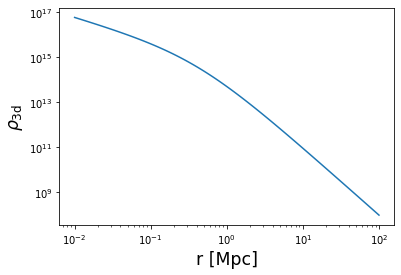

In [8]:
plot_profile(r3d, rho, '$\\rho_{\\rm 3d}$')

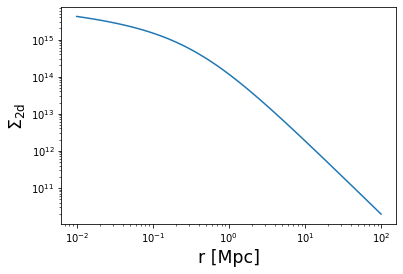

In [9]:
plot_profile(r3d, Sigma, '$\\Sigma_{\\rm 2d}$')

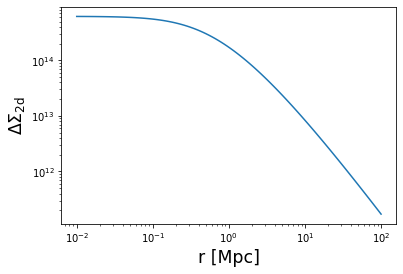

In [10]:
plot_profile(r3d, DeltaSigma, '$\\Delta\\Sigma_{\\rm 2d}$')

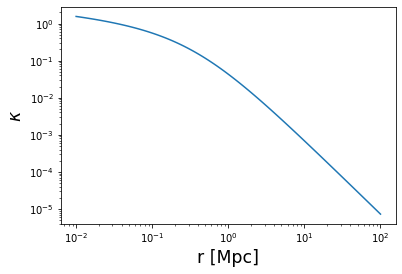

In [11]:
plot_profile(r3d, kappa, '$\\kappa$')

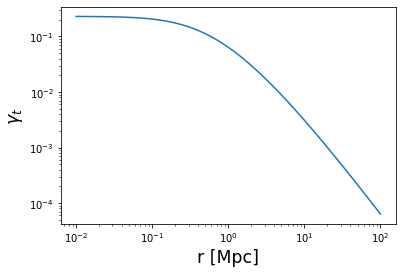

In [12]:
plot_profile(r3d, gammat, '$\\gamma_t$')

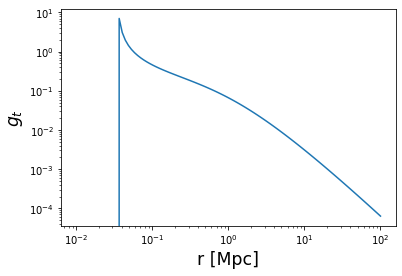

In [13]:
plot_profile(r3d, gt, '$g_t$')

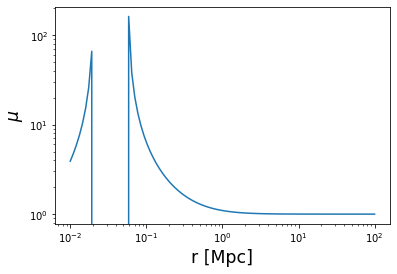

In [14]:
plot_profile(r3d, mu, '$\mu$')

(-3.0, 5.0)

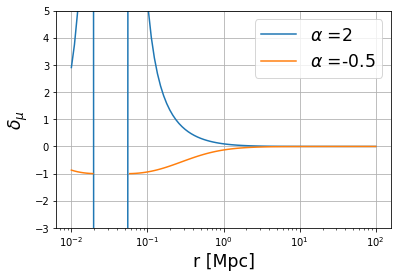

In [15]:
plot_profile(r3d, mu_bias[0]-1, profile_label = '$\delta_{\mu}$', label = '$\\alpha$ =' + str(alpha[0]))
plot_profile(r3d, mu_bias[1]-1, '$\delta_{\mu}$', label = '$\\alpha$ =' + str(alpha[1]))

plt.legend(fontsize='xx-large')
plt.yscale('linear')
plt.grid()

plt.ylim(-3,5)

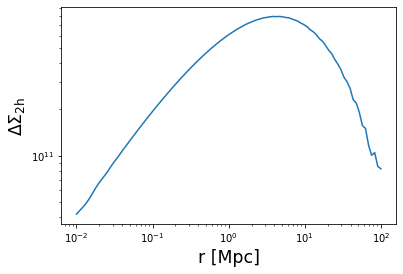

In [16]:
# The 2-halo term excess surface density is currently only implemented for the CCL backend
# An error will be raised if using the CT or NC backend instead

DeltaSigma_2h = moo.eval_excess_surface_density_2h_nobias(r3d, z_cl)
plot_profile(r3d, DeltaSigma_2h, '$\\Delta\\Sigma_{\\rm 2h}$')

In [17]:
np.savetxt('term2h_nc.txt',np.array([r3d, DeltaSigma_2h]).T)

In [ ]:
print(cosmo.get_rho_m(0.2)*cosmo.cor_factor)
print(cosmo.get_rho_m(0.2))

In [19]:
np.array([r3d, DeltaSigma_2h])

array([[1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
        1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
        2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
        3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
        4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
        6.42807312e-02, 7.05480231e-02, 7.74263683e-02, 8.49753436e-02,
        9.32603347e-02, 1.02353102e-01, 1.12332403e-01, 1.23284674e-01,
        1.35304777e-01, 1.48496826e-01, 1.62975083e-01, 1.78864953e-01,
        1.96304065e-01, 2.15443469e-01, 2.36448941e-01, 2.59502421e-01,
        2.84803587e-01, 3.12571585e-01, 3.43046929e-01, 3.76493581e-01,
        4.13201240e-01, 4.53487851e-01, 4.97702356e-01, 5.46227722e-01,
        5.99484250e-01, 6.57933225e-01, 7.22080902e-01, 7.92482898e-01,
        8.69749003e-01, 9.54548457e-01, 1.04761575e+00, 1.14975700e+00,
        1.26185688e+00, 1.38488637e+00, 1.51991108e+00, 1.668100

In [20]:
nc = np.loadtxt('term2h_nc.txt')
ccl = np.loadtxt('term2h_ccl.txt')

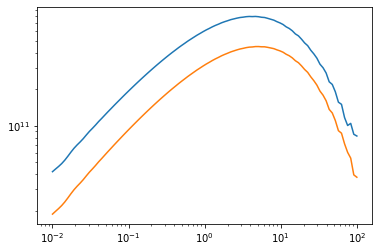

In [21]:
plt.loglog(nc.T[0],nc.T[1])
plt.loglog(ccl.T[0],ccl.T[1])

In [ ]:
plt.loglog(nc.T[0], nc.T[1]/ccl.T[1])